In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
# 1. DATA UNDERSTANDING


missing_values = df[['Confirmed', 'Deaths', 'Recovered', 'Date']].isnull().sum()
print("\nCOVID-19 DATA ANALYSIS\n")
print("1. DATA UNDERSTANDING")
print(f"1.1 Missing Values:\n{missing_values}\n")

duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}\n")

data_types = df[['Confirmed', 'Deaths', 'Recovered', 'Date']].dtypes
print(f"1.2 Data Types:\n{data_types}\n")

time_series_check = 'Yes' if pd.to_datetime(df['Date'], errors='coerce').notnull().all() else 'No'
print(f"1.3 Time-Series Format: {time_series_check}\n")




COVID-19 DATA ANALYSIS

1. DATA UNDERSTANDING
1.1 Missing Values:
Confirmed    0
Deaths       0
Recovered    0
Date         0
dtype: int64

Duplicates: 0

1.2 Data Types:
Confirmed     int64
Deaths        int64
Recovered     int64
Date         object
dtype: object

1.3 Time-Series Format: Yes




2. DESCRIPTIVE ANALYSIS

--- Total Cases & Deaths ---
                       Confirmed    Deaths
Country/Region                            
US                     224345948  11011411
Brazil                  89524967   3938034
Russia                  45408411    619385
India                   40883464   1111831
Spain                   27404045   3033030
...                          ...       ...
Saint Kitts and Nevis       1772         0
Greenland                   1507         0
Holy See                    1356         0
Papua New Guinea            1185         2
Western Sahara               901        63

[187 rows x 2 columns]

Highest Cases: US (224345948)
Highest Deaths: US (11011411)

--- Trend in India ---
            Confirmed  Deaths
Date                         
2020-01-22          0       0
2020-01-23          0       0
2020-01-24          0       0
2020-01-25          0       0
2020-01-26          0       0
...               ...     ...
2020-07-23    1288108   30601
2020-07

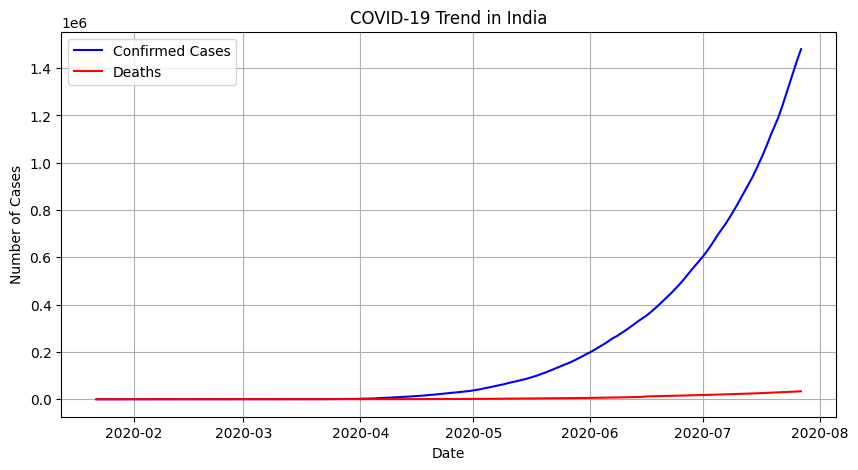


--- Top 10 Countries by Confirmed Cases ---
                Confirmed    Deaths
Country/Region                     
US              224345948  11011411
Brazil           89524967   3938034
Russia           45408411    619385
India            40883464   1111831
Spain            27404045   3033030
United Kingdom   26748587   3997775
Italy            26745145   3707717
France           21210926   3048524
Germany          21059152    871322
Iran             19339267   1024136

--- Top 10 Countries by Deaths ---
                Confirmed    Deaths
Country/Region                     
US              224345948  11011411
United Kingdom   26748587   3997775
Brazil           89524967   3938034
Italy            26745145   3707717
France           21210926   3048524
Spain            27404045   3033030
Mexico           14946202   1728277
India            40883464   1111831
Iran             19339267   1024136
Belgium           6281116    963679

Population column not found — cannot compute cases per

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

print("\n2. DESCRIPTIVE ANALYSIS")

#  2.1 Total Cases & Deaths per Country
total_cases_deaths = df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().sort_values(by='Confirmed', ascending=False)
highest_cases_country = total_cases_deaths['Confirmed'].idxmax()
highest_deaths_country = total_cases_deaths['Deaths'].idxmax()

print("\n--- Total Cases & Deaths ---")
print(total_cases_deaths)
print(f"\nHighest Cases: {highest_cases_country} ({total_cases_deaths['Confirmed'].max()})")
print(f"Highest Deaths: {highest_deaths_country} ({total_cases_deaths['Deaths'].max()})\n")

# 2.2 Trend Analysis (Example: India)
country_name = "India"  # Change as needed
country_df = df[df['Country/Region'] == country_name].groupby('Date')[['Confirmed', 'Deaths']].sum()

print(f"--- Trend in {country_name} ---")
print(country_df)

plt.figure(figsize=(10,5))
plt.plot(country_df.index, country_df['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(country_df.index, country_df['Deaths'], label='Deaths', color='red')
plt.title(f"COVID-19 Trend in {country_name}")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

# 2.3 Geographical Distribution (Top 10)
print("\n--- Top 10 Countries by Confirmed Cases ---")
print(total_cases_deaths.head(10))

print("\n--- Top 10 Countries by Deaths ---")
print(total_cases_deaths.sort_values(by='Deaths', ascending=False).head(10))

# 2.4 Cases per 1,000 People 
if 'Population' in df.columns:
    pop_data = df.groupby('Country/Region').agg({'Confirmed':'sum', 'Population':'max'})
    pop_data['Cases_per_1000'] = (pop_data['Confirmed'] / pop_data['Population']) * 1000
    print("\n--- Cases per 1,000 People ---")
    print(pop_data[['Cases_per_1000']].sort_values(by='Cases_per_1000', ascending=False))
else:
    print("\nPopulation column not found — cannot compute cases per 1,000 people.")


In [5]:
# 3. COMPARATIVE ANALYSIS 
highest_confirmed = (total_cases_deaths['Confirmed'].idxmax(), total_cases_deaths['Confirmed'].max())
lowest_confirmed = (total_cases_deaths['Confirmed'].idxmin(), total_cases_deaths['Confirmed'].min())
highest_deaths = (total_cases_deaths['Deaths'].idxmax(), total_cases_deaths['Deaths'].max())
lowest_deaths = (total_cases_deaths['Deaths'].idxmin(), total_cases_deaths['Deaths'].min())

print("3. COMPARATIVE ANALYSIS")
print('3.1 Highest and Lowest')
print(f"Highest Confirmed: {highest_confirmed}")
print(f"Lowest Confirmed: {lowest_confirmed}")
print(f"Highest Deaths: {highest_deaths}")
print(f"Lowest Deaths: {lowest_deaths}\n")

#3.3 Recovery vs. Death Rate 
print("\n3.3 Recovery vs Death Rate")

recovery_death_df = df.groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths']].sum()
recovery_death_df['RecoveryRate'] = recovery_death_df['Recovered'] / recovery_death_df['Confirmed']
recovery_death_df['DeathRate'] = recovery_death_df['Deaths'] / recovery_death_df['Confirmed']

print("\nRecovery and Death Rates by Country:")
print(recovery_death_df[['RecoveryRate', 'DeathRate']].sort_values(by='RecoveryRate', ascending=False))



3. COMPARATIVE ANALYSIS
3.1 Highest and Lowest
Highest Confirmed: ('US', np.int64(224345948))
Lowest Confirmed: ('Western Sahara', np.int64(901))
Highest Deaths: ('US', np.int64(11011411))
Lowest Deaths: ('Vietnam', np.int64(0))


3.3 Recovery vs Death Rate

Recovery and Death Rates by Country:
                RecoveryRate  DeathRate
Country/Region                         
Liechtenstein       0.915564   0.011207
Greenland           0.910418   0.000000
Iceland             0.859389   0.005157
Thailand            0.852216   0.017158
New Zealand         0.849874   0.012394
...                      ...        ...
Canada              0.000000   0.074768
Mozambique          0.000000   0.006223
Timor-Leste         0.000000   0.000000
Sweden              0.000000   0.090267
Syria               0.000000   0.046453

[187 rows x 2 columns]


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
# 4. Predictive Modelling
# 4.1

print('4. Predictive Modelling')


df['Date'] = pd.to_datetime(df['Date'])

print("\n--- Covid-19 Future Cases Prediction ---")
country = input("Enter country name: ")


country_data = df[df['Country/Region'] == country].groupby('Date')['Confirmed'].sum().reset_index()


country_data['Days'] = (country_data['Date'] - country_data['Date'].min()).dt.days
X = country_data[['Days']]
y = country_data['Confirmed']


model = LinearRegression()
model.fit(X, y)

n = int(input("Enter number of future days to predict: "))
future_days = np.array(range(country_data['Days'].max() + 1, country_data['Days'].max() + n + 1)).reshape(-1, 1)
predictions = model.predict(future_days)

print(f"\n4.1 Predicted Covid-19 cases for {country} in next {n} days:")
for day, pred in zip(range(1, n+1), predictions):
    print(f"Day {day}: {int(pred)} cases")





4. Predictive Modelling

--- Covid-19 Future Cases Prediction ---


Enter country name:  England


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [7]:
#4.2 Predict Deaths from Confirmed Cases

from sklearn.model_selection import train_test_split

print("\n--- Predict Deaths from Confirmed Cases ---")
country = input("Enter country name: ")

country_data = df[df['Country/Region'] == country].groupby('Date')[['Confirmed', 'Deaths']].sum().reset_index()

X = country_data[['Confirmed']]
y = country_data['Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


confirmed_cases = int(input("\nEnter number of confirmed cases to predict deaths: "))
predicted_deaths = model.predict([[confirmed_cases]])[0]
print(f"Predicted deaths: {int(predicted_deaths)}")




--- Predict Deaths from Confirmed Cases ---


Enter country name:  India

Enter number of confirmed cases to predict deaths:  22


Predicted deaths: 7


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 5.CORRELATION & CAUSALITY 
correlation = df['Confirmed'].corr(df['Deaths'], method='pearson')
print("5. CORRELATION & CAUSALITY")
print(f"Correlation between Confirmed & Deaths (Pearson): {correlation}\n")


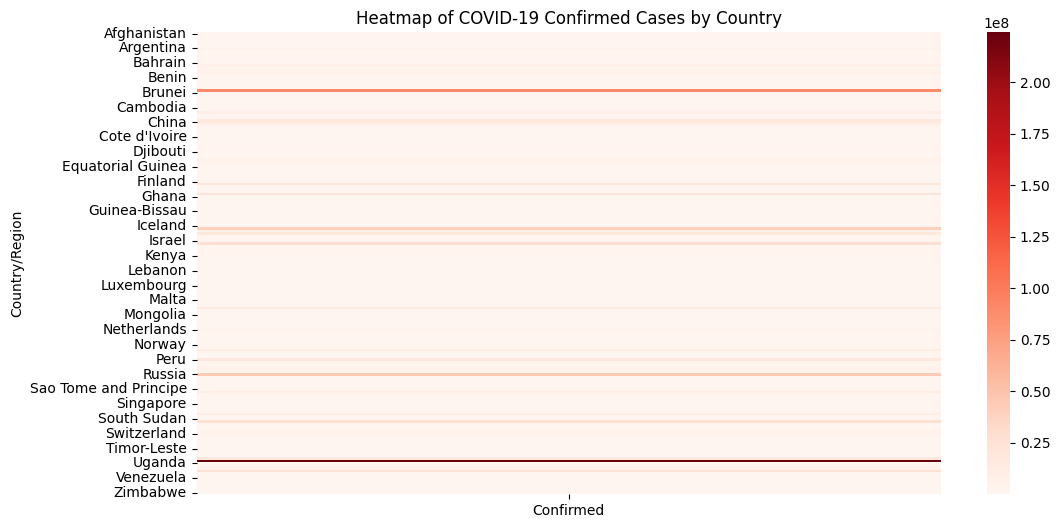

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns




df['Date'] = pd.to_datetime(df['Date'])

# 6.1 Heatmap for Geographical Spread
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
heatmap_data = country_data.pivot_table(values='Confirmed', index='Country/Region', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='Reds')
plt.title("Heatmap of COVID-19 Confirmed Cases by Country")
plt.show()




In [ ]:
# === 6.2 Line Chart for Trends (User Input Country) ===
country_name = input("Enter the country name for COVID-19 trend analysis: ").strip()


country_df = df[df['Country/Region'].str.lower() == country_name.lower()] \
                .groupby('Date')[['Confirmed', 'Deaths']].sum()

if not country_df.empty:
    plt.figure(figsize=(10,5))
    plt.plot(country_df.index, country_df['Confirmed'], label='Confirmed Cases', color='blue')
    plt.plot(country_df.index, country_df['Deaths'], label='Deaths', color='red')
    plt.title(f"COVID-19 Trend in {country_name.title()}")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for '{country_name}'. Please check the spelling.")




In [ ]:
# 6.3 Bar Chart (Cases, Deaths, Recovery Rates)
bar_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)
bar_data.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries - Cases, Deaths, Recovered")
plt.ylabel("Number of People")
plt.show()

# 6.4 Pie Chart for Cases Distribution
pie_data = df.groupby('Country/Region')[['Confirmed', 'Recovered', 'Deaths']].sum().sum()
plt.figure(figsize=(6,6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightcoral'])
plt.title("Global COVID-19 Cases Distribution")
plt.show()

In [12]:
# 7.1 – K-Means Clustering of Countries (Fixed Version)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

print("\n--- K-Means Clustering of Countries ---")

# Check if Population exists
if 'Population' not in df.columns:
    print("Population column not found! Assigning placeholder values for demonstration...")
    # Assigning random placeholder population between 1M and 150M
    np.random.seed(42)
    df['Population'] = np.random.randint(1_000_000, 150_000_000, size=len(df))


country_summary = df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Population': 'max'
}).reset_index()


country_summary[['Confirmed', 'Deaths', 'Population']] = country_summary[['Confirmed', 'Deaths', 'Population']].apply(pd.to_numeric, errors='coerce')
country_summary.dropna(inplace=True)


X = country_summary[['Confirmed', 'Deaths', 'Population']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
country_summary['Cluster'] = kmeans.fit_predict(X_scaled)

#  results
print("\nCountries and their clusters:")
print(country_summary[['Country/Region', 'Cluster']].sort_values('Cluster'))



--- K-Means Clustering of Countries ---
Population column not found! Assigning placeholder values for demonstration...

Countries and their clusters:
     Country/Region  Cluster
0       Afghanistan        0
1           Albania        0
2           Algeria        0
3           Andorra        0
4            Angola        0
..              ...      ...
79            India        3
132            Peru        3
157           Spain        3
138          Russia        3
177  United Kingdom        3

[187 rows x 2 columns]


In [10]:
# 7.2 – Risk Factor Analysis

print("\n--- Risk Factor Analysis: Population Density vs Covid Cases ---")

if 'Population Density' in df.columns:
    country_summary = df.groupby('Country/Region').agg({
        'Confirmed': 'max',
        'Population Density': 'max'
    }).reset_index()

    correlation = country_summary['Confirmed'].corr(country_summary['Population Density'])
    print(f"Correlation between population density and confirmed cases: {correlation:.4f}")

    if abs(correlation) > 0.5:
        print("=> Strong correlation detected.")
    else:
        print("=> Weak or no significant correlation.")
else:
    print("Population density data is not available in the dataset.")



--- Risk Factor Analysis: Population Density vs Covid Cases ---
Population density data is not available in the dataset.


In [ ]:
# Example questions

# 1. Descriptive Analysis – Trend in India (last 6 months)



df = pd.read_csv("covid_19_clean_complete.csv")
df['Date'] = pd.to_datetime(df['Date'])


india_data = df[df['Country/Region'] == "India"].copy()
last_date = india_data['Date'].max()
six_months_ago = last_date - pd.DateOffset(months=6)
india_last6 = india_data[india_data['Date'] >= six_months_ago]


india_last6['Daily_Cases'] = india_last6['Confirmed'].diff().fillna(0)
india_last6['Daily_Deaths'] = india_last6['Deaths'].diff().fillna(0)

# Plot
plt.figure(figsize=(10,6))
plt.plot(india_last6['Date'], india_last6['Daily_Cases'], label="Daily Cases", color="blue")
plt.plot(india_last6['Date'], india_last6['Daily_Deaths'], label="Daily Deaths", color="red")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("India – Daily Covid-19 Cases & Deaths (Last 6 Months)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# 2.Predictive Modeling – Brazil (next 30 days)

brazil_data = df[df['Country/Region'] == "Brazil"].copy()


brazil_data['Days_Since'] = (brazil_data['Date'] - brazil_data['Date'].min()).dt.days
X = brazil_data[['Days_Since']]
y = brazil_data['Confirmed']


model = LinearRegression()
model.fit(X, y)


future_days = np.arange(brazil_data['Days_Since'].max() + 1, 
                        brazil_data['Days_Since'].max() + 31).reshape(-1, 1)
future_preds = model.predict(future_days)

# prediction 
future_dates = pd.date_range(start=brazil_data['Date'].max() + pd.Timedelta(days=1), periods=30)
pred_df = pd.DataFrame({"Date": future_dates, "Predicted_Confirmed": future_preds.astype(int)})

print("\n--- Predicted Covid-19 Cases in Brazil for Next 30 Days ---")
print(pred_df)



--- Predicted Covid-19 Cases in Brazil for Next 30 Days ---
         Date  Predicted_Confirmed
0  2020-07-28              1501283
1  2020-07-29              1512130
2  2020-07-30              1522978
3  2020-07-31              1533825
4  2020-08-01              1544673
5  2020-08-02              1555520
6  2020-08-03              1566368
7  2020-08-04              1577215
8  2020-08-05              1588063
9  2020-08-06              1598910
10 2020-08-07              1609758
11 2020-08-08              1620605
12 2020-08-09              1631453
13 2020-08-10              1642300
14 2020-08-11              1653148
15 2020-08-12              1663995
16 2020-08-13              1674843
17 2020-08-14              1685690
18 2020-08-15              1696538
19 2020-08-16              1707385
20 2020-08-17              1718233
21 2020-08-18              1729080
22 2020-08-19              1739928
23 2020-08-20              1750775
24 2020-08-21              1761623
25 2020-08-22              17

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 3. Heatmap – Spread by Country Over Time

import seaborn as sns

heatmap_data = df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()


heatmap_pivot = heatmap_data.pivot(index='Country/Region', columns='Date', values='Confirmed').fillna(0)

# Plot
plt.figure(figsize=(14,10))
sns.heatmap(heatmap_pivot, cmap="Reds", cbar_kws={'label': 'Confirmed Cases'})
plt.title("Covid-19 Spread Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Country")
plt.show()


In [ ]:
# 4. Correlation Analysis – USA Cases vs Tests
# Filter USA data
usa_data = df[df['Country/Region'] == "US"].copy()

if "Tests" in usa_data.columns:
    corr_value = usa_data['Confirmed'].corr(usa_data['Tests'])
    print(f"\nCorrelation between Confirmed Cases and Tests in USA: {corr_value:.4f}")
    
    plt.scatter(usa_data['Tests'], usa_data['Confirmed'], alpha=0.5)
    plt.xlabel("Tests Conducted")
    plt.ylabel("Confirmed Cases")
    plt.title("USA: Tests vs Confirmed Cases")
    plt.show()
else:
    print("\nNo 'Tests' column found in dataset.")
